# Random Forest

Random Forest Algorithm widespread popularity stems from its user-friendly nature and adaptability, enabling it to tackle both classification and regression problems effectively. The algorithm’s strength lies in its ability to handle complex datasets and mitigate overfitting, making it a valuable tool for various predictive tasks in machine learning.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks. In this tutorial, we will understand the working of random forest and implement random forest on a classification task.

Steps Involved in Random Forest Algorithm

Step 1: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision
tree. Simply put, n random records and m features are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [11]:
company=pd.read_csv('Company_Data.csv')

In [12]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [13]:
company.tail()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes

In [14]:
company.shape

(400, 11)

In [15]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [16]:
company[company.duplicated()].shape

(0, 11)

In [17]:
company[company.duplicated()].sum()

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

In [18]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [19]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

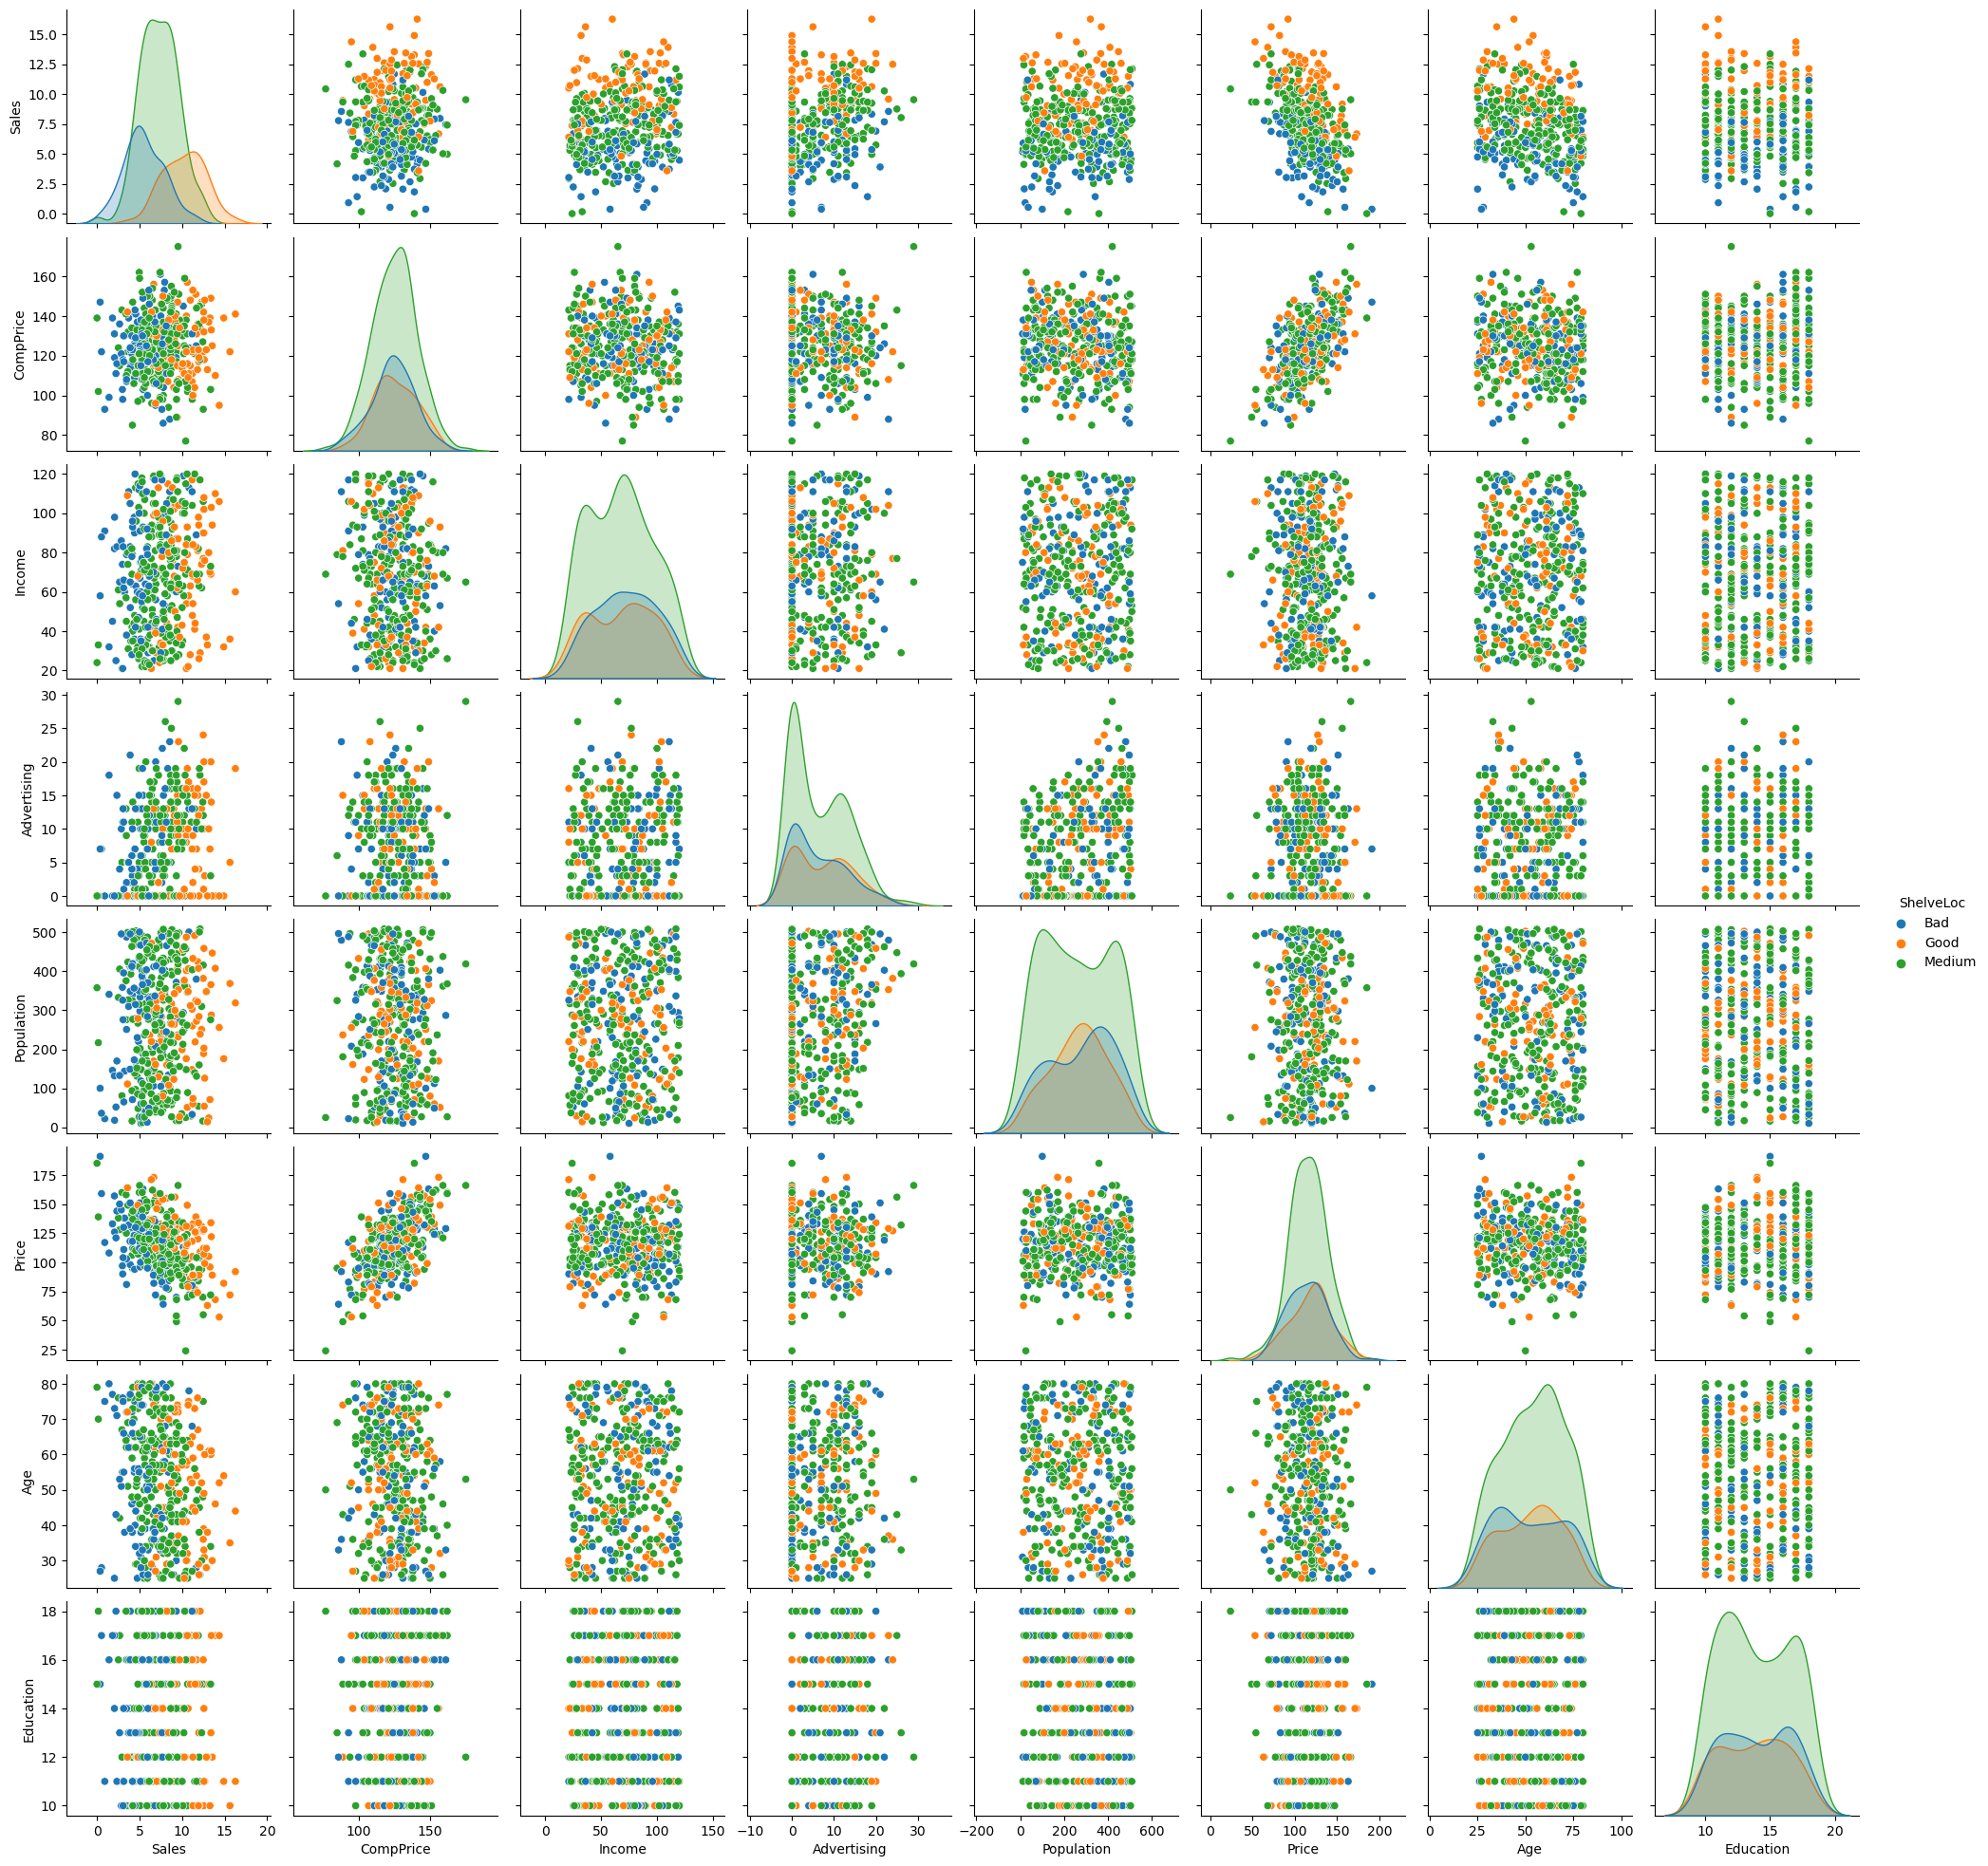

In [20]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=company, hue = 'ShelveLoc')
plt.show()

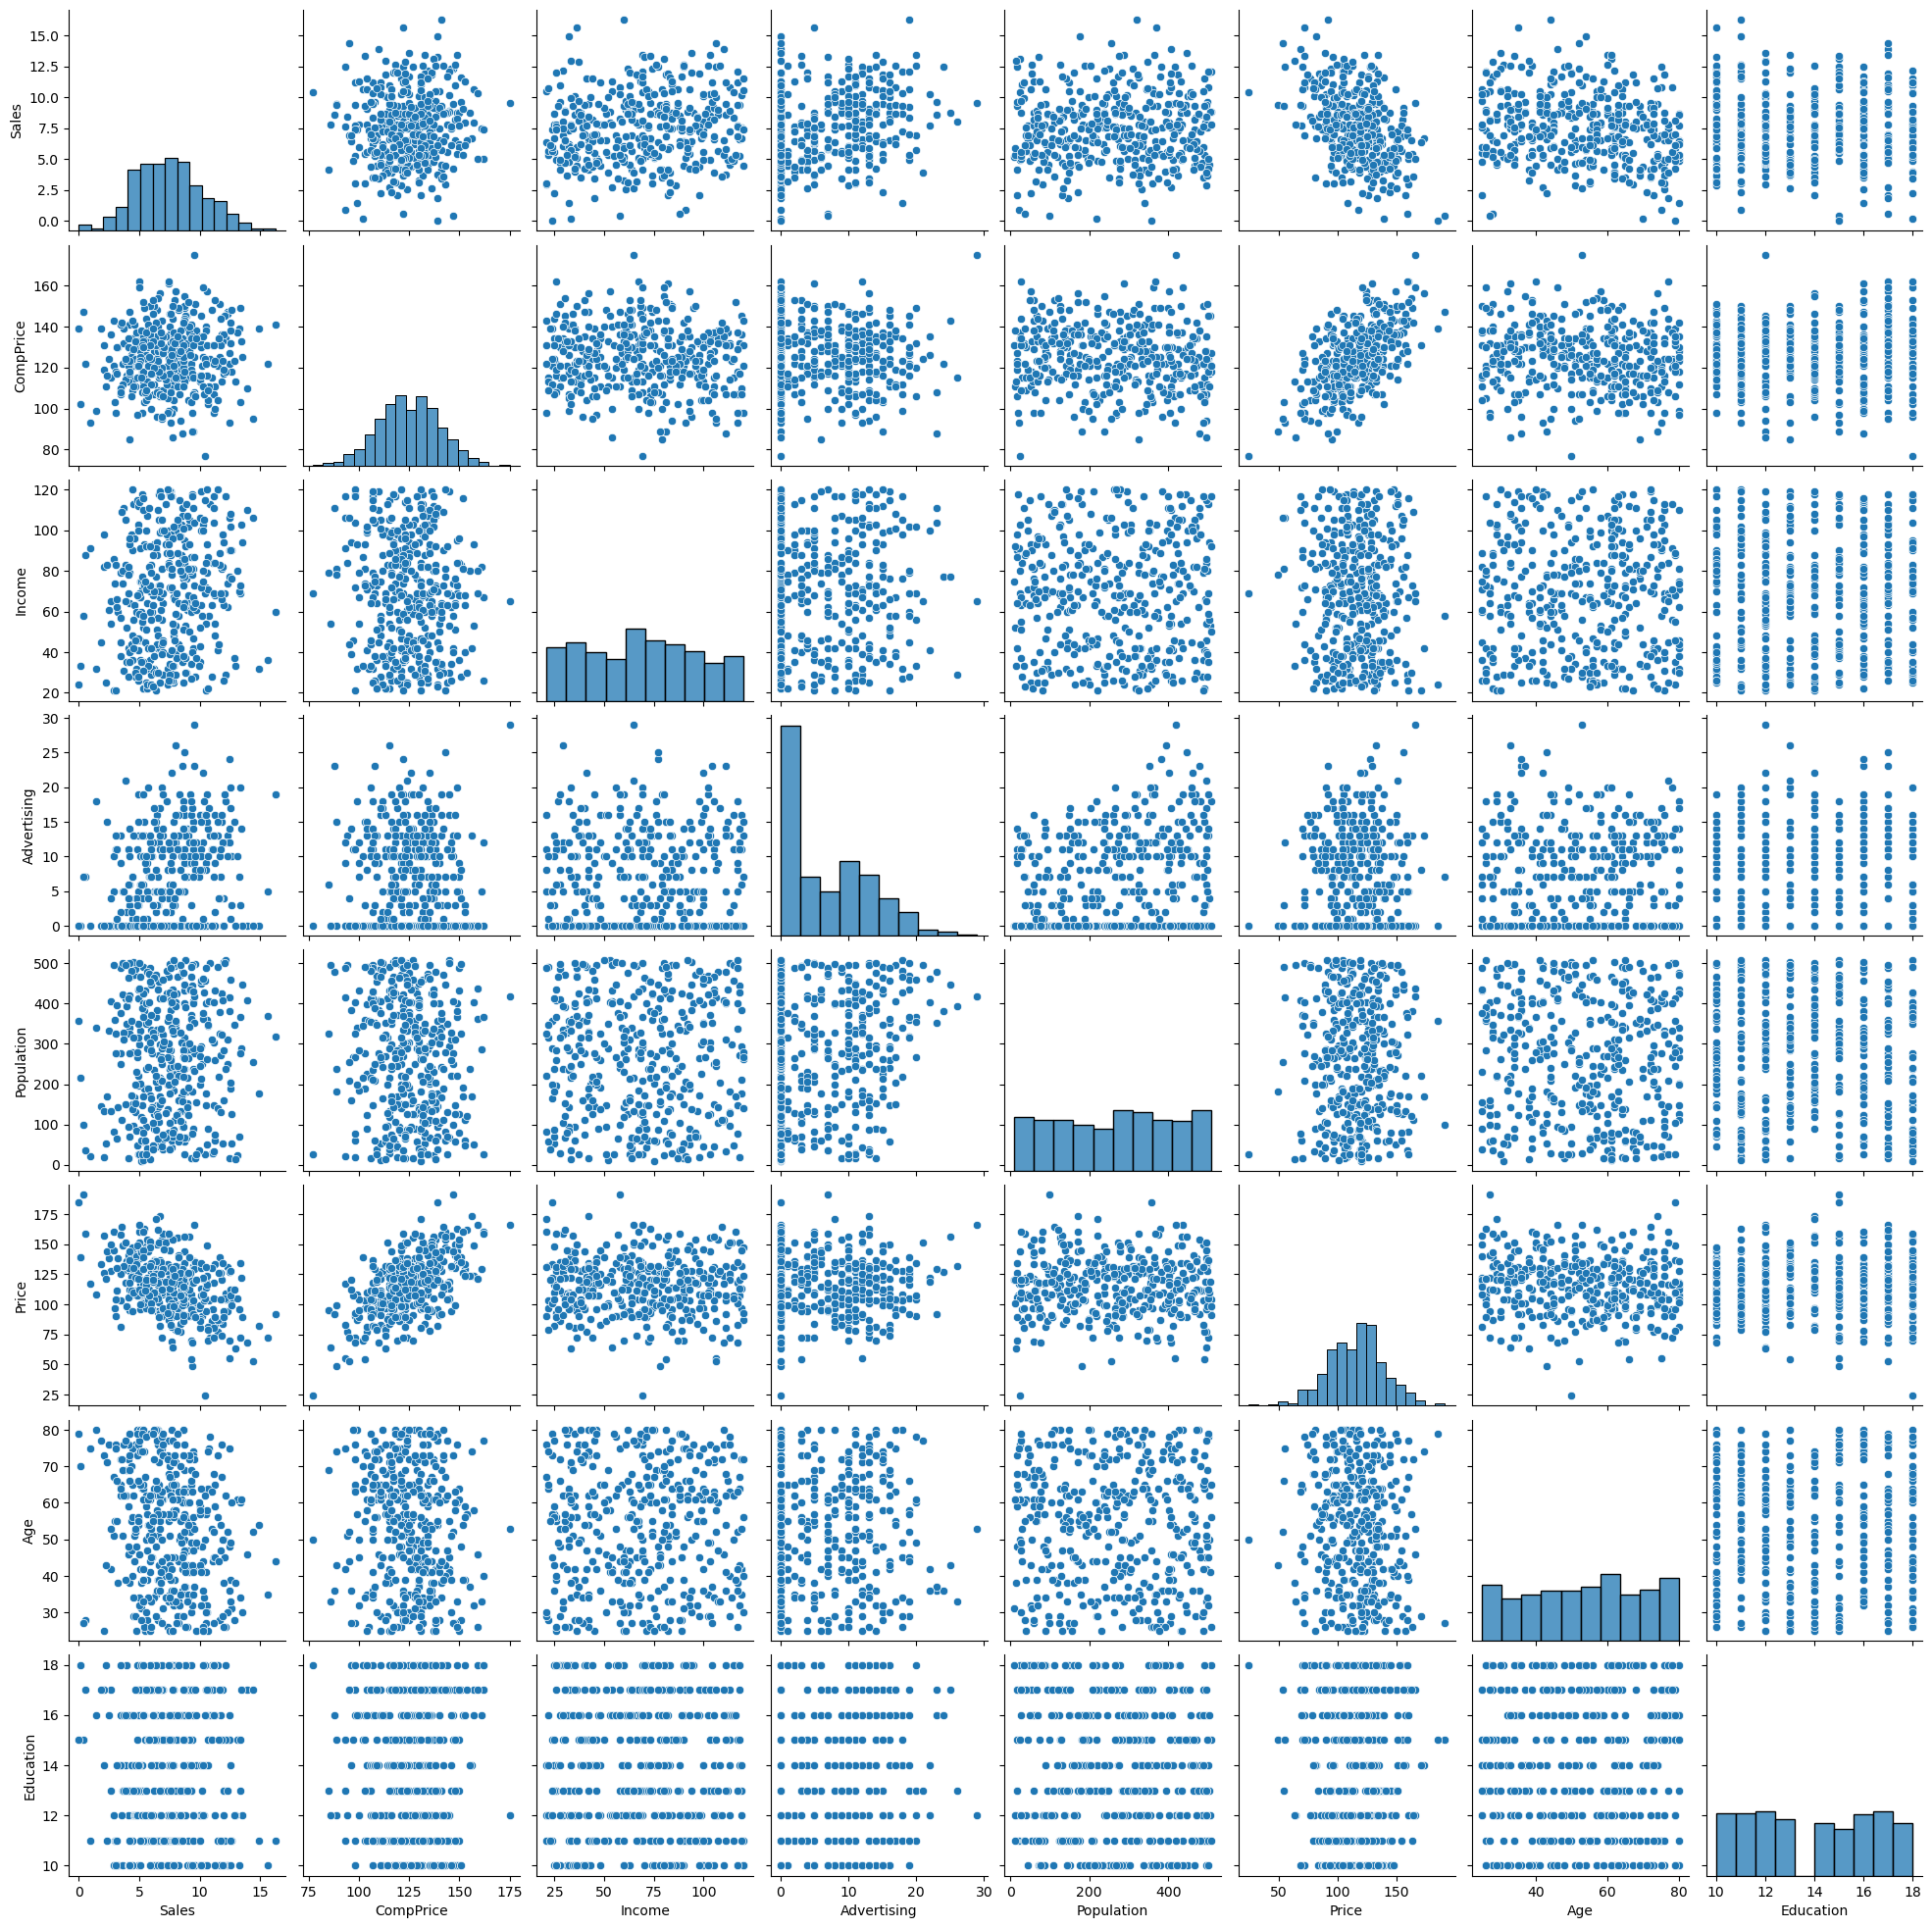

In [21]:
sns.pairplot(company)

<Axes: >

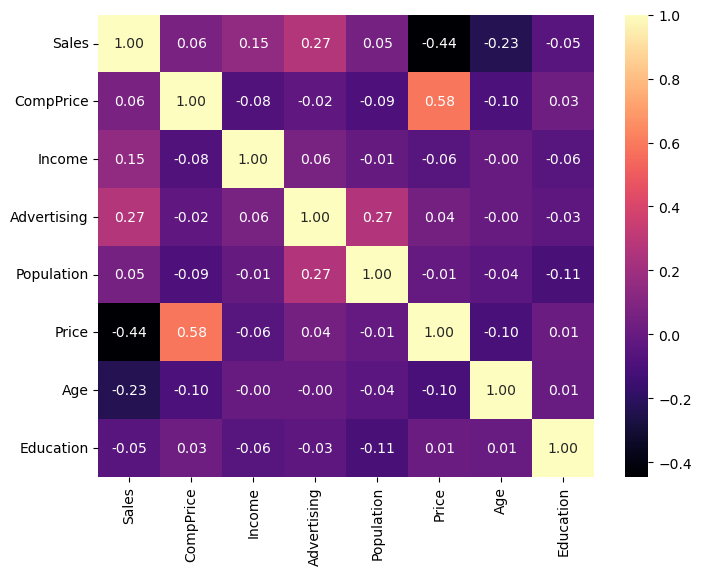

In [24]:
plt.figure(figsize = (8, 6));
sns.heatmap(company.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: >

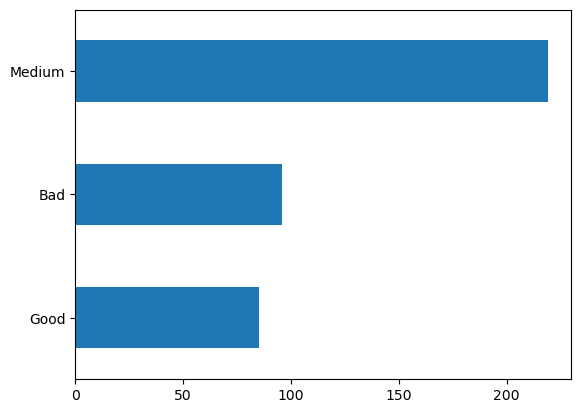

In [25]:
company.ShelveLoc.value_counts(ascending=True).plot(kind='barh')


In [14]:
#Creating dummy vairables dropping first dummy variable
company=pd.get_dummies(company,columns=['ShelveLoc','Education','Urban','US'], drop_first=True)

In [15]:
company

Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0     9.50        138      73           11         276    120   42   
1    11.22        111      48           16         260     83   65   
2    10.06        113      35           10         269     80   59   
3     7.40        117     100            4         466     97   55   
4     4.15        141      64            3         340    128   38   
..     ...        ...     ...          ...         ...    ...  ...   
395  12.57        138     108           17         203    128   33   
396   6.14        139      23            3          37    120   55   
397   7.41        162      26           12         368    159   40   
398   5.94        100      79            7         284     95   50   
399   9.71        134      37            0          27    120   49   

     ShelveLoc_Good  ShelveLoc_Medium  Education_11  Education_12  \
0                 0                 0             0             0   
1                 1                 0             0             0   
2                 0                 1             0             1   
3                 0                 1             0             0   
4                 0                 0             0             0   
..              ...               ...           ...           ...   
395               1                 0             0             0   
396               0                 1             1             0   
397               0                 1             0             0   
398               0                 0             0             1   
399               1                 0             0             0   

     Education_13  Education_14  Education_15  Education_16  Education_17  \
0               0             0             0             0             1   
1               0             0             0             0             0   
2               0             0             0             0             0   
3               0             1             0             0             0   
4               1             0             0             0             0   
..            ...           ...           ...           ...           ...   
395             0             1             0             0             0   
396             0             0             0             0             0   
397             0             0             0             0             0   
398             0             0             0             0             0   
399             0             0             0             1             0   

     Education_18  Urban_Yes  US_Yes  
0               0          1       1  
1               0          1       1  
2               0          1       1  
3               0          1       1  
4               0          1       0  
..            ...        ...     ...  
395             0          1       1  
396             0          0       1  
397             1          1       1  
398             0          1       1  
399             0          1       1  

[400 rows x 19 columns]

In [16]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   ShelveLoc_Good    400 non-null    uint8  
 8   ShelveLoc_Medium  400 non-null    uint8  
 9   Education_11      400 non-null    uint8  
 10  Education_12      400 non-null    uint8  
 11  Education_13      400 non-null    uint8  
 12  Education_14      400 non-null    uint8  
 13  Education_15      400 non-null    uint8  
 14  Education_16      400 non-null    uint8  
 15  Education_17      400 non-null    uint8  
 16  Education_18      400 non-null    uint8  
 1

In [17]:
# check VIF for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X=company.iloc[:,1:]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_dfs = []
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_dfs.append(vif_data)
vif_dfs

# drop all those column having VIF > 5

[             feature        VIF
 0          CompPrice  59.586539
 1             Income   6.553606
 2        Advertising   4.208371
 3         Population   4.578706
 4              Price  39.074588
 5                Age  10.435923
 6     ShelveLoc_Good   1.915779
 7   ShelveLoc_Medium   3.362615
 8       Education_11   1.887474
 9       Education_12   1.907952
 10      Education_13   1.839822
 11      Education_14   1.744487
 12      Education_15   1.693303
 13      Education_16   1.911645
 14      Education_17   1.947399
 15      Education_18   1.767227
 16         Urban_Yes   3.492272
 17            US_Yes   5.563619]

In [18]:
# drop all those column having very very high VIF
company=company.drop(['CompPrice'], axis=1)

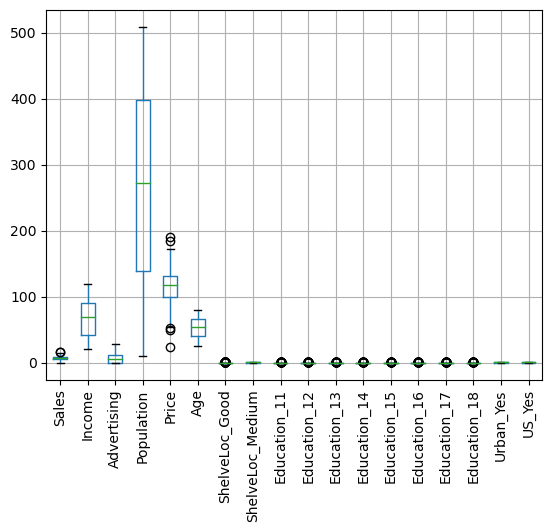

In [19]:
# check for outliers
# Boxplots are primarily used for visualizing the distribution of numerical data and identifying outliers in numerical columns.
# Therefore Here Sales and Price Having The Outliers.
# Decision trees, including ensemble methods like Random Forests, are generally not as sensitive to outliers as some other algorithms (e.g., linear regression or k-nearest neighbors).
# Decision trees make splits based on the proportion of samples within the split ranges, and the process is relatively robust to the scale and presence of outliers.
# If you're using decision trees and are not concerned about outliers affecting the model significantly, you may choose not to perform outlier imputation.
# Decision trees are capable of handling data with outliers without significant negative impacts on their performance.

company.boxplot();
plt.xticks(rotation=90);

In [20]:
# convertion of numerical values of Sales column to categorical values

# Define the bins and labels
bins = [company.Sales.min(), np.percentile(company.Sales, 25), np.percentile(company.Sales, 50), np.percentile(company.Sales, 75), company.Sales.max()]  # Define the bin edges
labels = ['very low', 'low', 'high', 'very high']  # Define the labels for each category

# Use pd.cut() to create the categorical column
company['Sales'] = pd.cut(company['Sales'], bins=bins, labels=labels)
company.head()

Sales  Income  Advertising  Population  Price  Age  ShelveLoc_Good  \
0  very high      73           11         276    120   42               0   
1  very high      48           16         260     83   65               1   
2  very high      35           10         269     80   59               0   
3        low     100            4         466     97   55               0   
4   very low      64            3         340    128   38               0   

   ShelveLoc_Medium  Education_11  Education_12  Education_13  Education_14  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 1             0             1             0             0   
3                 1             0             0             0             1   
4                 0             0             0             1             0   

   Education_15  Education_16  Education_17  Education_18  Urban_Yes  US_Yes  
0             0             0             1             0          1       1  
1             0             0             0             0          1       1  
2             0             0             0             0          1       1  
3             0             0             0             0          1       1  
4             0             0             0             0          1       0

In [21]:
company.Sales.value_counts()

low          101
high         100
very low      99
very high     99
Name: Sales, dtype: int64

#### Having balanced classes is generally beneficial for machine learning models, as it helps prevent the model from being biased towards the majority class. If your goal is classification and you have a balanced dataset, you may not need to perform any upsampling (increasing the number of instances in the minority class) or downsampling (reducing the number of instances in the majority class) to address class imbalance.



In [22]:
company.isnull().sum()


Sales               1
Income              0
Advertising         0
Population          0
Price               0
Age                 0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Education_11        0
Education_12        0
Education_13        0
Education_14        0
Education_15        0
Education_16        0
Education_17        0
Education_18        0
Urban_Yes           0
US_Yes              0
dtype: int64

In [23]:
company.Sales.mode().iloc[0]

'low'

In [24]:
# filling null values with mode
company['Sales'] = company['Sales'].fillna('low')

In [25]:
company.isnull().sum()

Sales               0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Education_11        0
Education_12        0
Education_13        0
Education_14        0
Education_15        0
Education_16        0
Education_17        0
Education_18        0
Urban_Yes           0
US_Yes              0
dtype: int64

# Random Forest Model

In [26]:

X=company.iloc[:,1:]
y=company['Sales']

In [27]:
# # Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [28]:
X_train

Income  Advertising  Population  Price  Age  ShelveLoc_Good  \
3       100            4         466     97   55               0   
18      110            0         408     68   46               1   
202      78            4         413    130   46               0   
250     105           10         435    156   72               1   
274      93            2          67    119   34               0   
..      ...          ...         ...    ...  ...             ...   
71       51           16         148    150   58               0   
106      33            0         217    139   70               0   
270      26            0         284     89   26               1   
348     102           20         459    107   49               1   
102      22            0          57     97   65               0   

     ShelveLoc_Medium  Education_11  Education_12  Education_13  Education_14  \
3                   1             0             0             0             1   
18                  0             0             0             0             0   
202                 0             0             0             0             0   
250                 0             0             0             0             1   
274                 1             1             0             0             0   
..                ...           ...           ...           ...           ...   
71                  1             0             0             0             0   
106                 1             0             0             0             0   
270                 0             0             0             0             0   
348                 0             1             0             0             0   
102                 1             0             0             0             0   

     Education_15  Education_16  Education_17  Education_18  Urban_Yes  US_Yes  
3               0             0             0             0          1       1  
18              0             0             1             0          0       1  
202             0             0             0             0          0       1  
250             0             0             0             0          1       1  
274             0             0             0             0          1       1  
..            ...           ...           ...           ...        ...     ...  
71              0             0             1             0          0       1  
106             0             0             0             1          0       0  
270             0             0             0             0          1       0  
348             0             0             0             0          1       1  
102             0             1             0             0          0       0  

[320 rows x 17 columns]

In [29]:
X_test

Income  Advertising  Population  Price  Age  ShelveLoc_Good  \
209      21           11         326     90   76               0   
280      86           10         496    145   51               0   
33       38           13         317    128   50               1   
210      41            2         357    123   47               0   
93       30            0          67    104   55               0   
..      ...          ...         ...    ...  ...             ...   
246      56           20         266     90   78               0   
227      64           10          68    101   57               0   
369     100           22         463    122   36               0   
176     107            9         480    154   47               0   
289      77           25         448    156   43               0   

     ShelveLoc_Medium  Education_11  Education_12  Education_13  Education_14  \
209                 0             1             0             0             0   
280                 0             0             0             0             0   
33                  0             0             0             0             0   
210                 0             0             0             0             1   
93                  1             0             0             0             0   
..                ...           ...           ...           ...           ...   
246                 0             0             0             0             0   
227                 1             0             0             0             0   
369                 1             0             0             0             1   
176                 1             1             0             0             0   
289                 1             0             0             0             0   

     Education_15  Education_16  Education_17  Education_18  Urban_Yes  US_Yes  
209             0             0             0             0          0       1  
280             0             0             0             0          1       1  
33              0             1             0             0          1       1  
210             0             0             0             0          0       1  
93              0             0             1             0          1       0  
..            ...           ...           ...           ...        ...     ...  
246             0             0             0             1          1       1  
227             0             1             0             0          1       1  
369             0             0             0             0          1       1  
176             0             0             0             0          0       1  
289             0             0             1             0          1       1  

[80 rows x 17 columns]

In [30]:
y_train

3            low
18     very high
202     very low
250         high
274          low
         ...    
71           low
106     very low
270    very high
348    very high
102     very low
Name: Sales, Length: 320, dtype: category
Categories (4, object): ['very low' < 'low' < 'high' < 'very high']

In [31]:
y_test

209     very low
280     very low
33          high
210     very low
93          high
         ...    
246          low
227         high
369    very high
176          low
289         high
Name: Sales, Length: 80, dtype: category
Categories (4, object): ['very low' < 'low' < 'high' < 'very high']

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

model = RandomForestClassifier()

# Define the hyperparameter grid
parameters = {'criterion': ['gini', 'entropy'], 'n_estimators':[10, 100, 150], 'max_depth': range(3, 6)}

# Create a GridSearchCV object with cross-validation
gsv = GridSearchCV(estimator=model, param_grid=parameters, cv=KFold(n_splits=10), verbose=400)

# Fit the grid search to the data
gsv.fit(X_train, y_train)

# Get the best model from the grid search
best_model = gsv.best_estimator_

# Evaluate the best model on the training data
training_accuracy = best_model.score(X_train, y_train)

print("Best parameters found by grid search:", gsv.best_params_)
print("Training accuracy of the best model:", training_accuracy)



Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10; 1/18] START criterion=gini, max_depth=3, n_estimators=10..............
[CV 1/10; 1/18] END criterion=gini, max_depth=3, n_estimators=10;, score=0.344 total time=   0.0s
[CV 2/10; 1/18] START criterion=gini, max_depth=3, n_estimators=10..............
[CV 2/10; 1/18] END criterion=gini, max_depth=3, n_estimators=10;, score=0.438 total time=   0.0s
[CV 3/10; 1/18] START criterion=gini, max_depth=3, n_estimators=10..............
[CV 3/10; 1/18] END criterion=gini, max_depth=3, n_estimators=10;, score=0.438 total time=   0.0s
[CV 4/10; 1/18] START criterion=gini, max_depth=3, n_estimators=10..............
[CV 4/10; 1/18] END criterion=gini, max_depth=3, n_estimators=10;, score=0.469 total time=   0.0s
[CV 5/10; 1/18] START criterion=gini, max_depth=3, n_estimators=10..............
[CV 5/10; 1/18] END criterion=gini, max_depth=3, n_estimators=10;, score=0.406 total time=   0.0s
[CV 6/10; 1/18] START criterion=gini, max_

In [52]:
model = RandomForestClassifier(criterion='entropy', max_depth=5)
model.fit(X_train,y_train)
model_train_score = model.score(X_train,y_train)*100
model_test_score = model.score(X_test,y_test)*100
print(f'train score is: {model_train_score} and test score is: {model_test_score}')

train score is: 86.25 and test score is: 57.49999999999999


In [58]:
# to view whole random forest of training data
from sklearn import tree
tree.export_graphviz(model.estimators_[0], out_file='tree.dot')

##### Here Accuracies are coming TOO low ,so Iam Going To use The Ensembling Techniques.

## Ensembling Methods
### 1.Bagging

We use bagging for combining weak learners of high variance. Bagging aims to produce a model with lower variance than the individual weak models. These weak learners are homogenous, meaning they are of the same type.

Bagging is also known as Bootstrap aggregating. It consists of two steps: bootstrapping and aggregation.


The steps of bagging are as follows:

1.We have an initial training dataset containing n-number of instances.

2.We create a m-number of subsets of data from the training set.  We take a subset of N sample points from the initial dataset for each subset. Each subset is taken with replacement. This means that a specific data point can be sampled more than once.

3.For each subset of data, we train the corresponding weak learners independently. These models are homogeneous, meaning that they are of the same type.

4.Each model makes a prediction.

5.The predictions are aggregated into a single prediction. For this, either max voting or averaging is used.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier


model1 = BaggingClassifier(estimator = DecisionTreeClassifier())

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(2,15), 'max_samples':range(1,10), 'max_features': range(2, len(X.columns))}
gsv = GridSearchCV(estimator = model1, param_grid = parameters, cv = KFold(n_splits = 10), verbose = 400)

gsv.fit(X_train,y_train)
gsv.score(X_train,y_train) 

Fitting 10 folds for each of 1755 candidates, totalling 17550 fits
[CV 1/10; 1/1755] START max_features=2, max_samples=1, n_estimators=2...........
[CV 1/10; 1/1755] END max_features=2, max_samples=1, n_estimators=2;, score=0.375 total time=   0.0s
[CV 2/10; 1/1755] START max_features=2, max_samples=1, n_estimators=2...........
[CV 2/10; 1/1755] END max_features=2, max_samples=1, n_estimators=2;, score=0.344 total time=   0.0s
[CV 3/10; 1/1755] START max_features=2, max_samples=1, n_estimators=2...........
[CV 3/10; 1/1755] END max_features=2, max_samples=1, n_estimators=2;, score=0.281 total time=   0.0s
[CV 4/10; 1/1755] START max_features=2, max_samples=1, n_estimators=2...........
[CV 4/10; 1/1755] END max_features=2, max_samples=1, n_estimators=2;, score=0.188 total time=   0.0s
[CV 5/10; 1/1755] START max_features=2, max_samples=1, n_estimators=2...........
[CV 5/10; 1/1755] END max_features=2, max_samples=1, n_estimators=2;, score=0.281 total time=   0.0s
[CV 6/10; 1/1755] START

0.346875

In [61]:
gsv.best_estimator_, gsv.best_score_

(BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=10,
                   max_samples=8, n_estimators=6),
 0.3875)

In [62]:
model1 = BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=10,
                   max_samples=8, n_estimators=6)
model1.fit(X_train,y_train)
model1_train_score= model1.score(X_train,y_train)
model1_test_score= model1.score(X_test,y_test)

print(f'train score is: {model1_train_score} and test score is: {model1_test_score}')

train score is: 0.29375 and test score is: 0.3


###### Here Accuracy Is still Decresed , so we can go ahead with others Methods

# Boosting
We use boosting for combining weak learners with high bias. Boosting aims to produce a model with a lower bias than that of the individual models. Like in bagging, the weak learners are homogeneous.

Boosting involves sequentially training weak learners. Here, each subsequent learner improves the errors of previous learners in the sequence. A sample of data is first taken from the initial dataset. This sample is used to train the first model, and the model makes its prediction. The samples can either be correctly or incorrectly predicted. The samples that are wrongly predicted are reused for training the next model. In this way, subsequent models can improve on the errors of previous models.

Unlike bagging, which aggregates prediction results at the end, boosting aggregates the results at each step. They are aggregated using weighted averaging.

Weighted averaging involves giving all models different weights depending on their predictive power. In other words, it gives more weight to the model with the highest predictive power. This is because the learner with the highest predictive power is considered the most important.

Boosting works with the following steps:

1.We sample m-number of subsets from an initial training dataset.

2.Using the first subset, we train the first weak learner.

3.We test the trained weak learner using the training data. As a result of the testing, some data points will be incorrectly predicted.

3.Each data point with the wrong prediction is sent into the second subset of data, and this subset is updated.

4.Using this updated subset, we train and test the second weak learner.

5.We continue with the following subset until the total number of subsets is reached.

6.We now have the total prediction. The overall prediction has already been aggregated at each step, so there is no need to calculate it.



### 3.Adaboost

It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.


In [63]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier(estimator = DecisionTreeClassifier())

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [0.01, 0.1, 1], 'n_estimators':[50, 100, 150]}
gsv = GridSearchCV(estimator = model3, param_grid = parameters, cv = KFold(n_splits = 5), verbose = 400)

gsv.fit(X_train,y_train)
gsv.score(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 1/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.281 total time=   0.0s
[CV 2/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 2/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.281 total time=   0.0s
[CV 3/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 3/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.312 total time=   0.0s
[CV 4/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 4/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.516 total time=   0.0s
[CV 5/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 5/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.391 total time=   0.0s
[CV 1/5; 2/9] START learning_rate=0.01, n_estimators=100........................
[CV 1/5; 2/9] END l

1.0

In [64]:
gsv.best_estimator_, gsv.best_score_

(AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.01,
                    n_estimators=150),
 0.3875)

In [65]:
model3 = AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.01,n_estimators=150)
model3.fit(X_train,y_train)
model3_train_score = model3.score(X_train,y_train)*100
model3_test_score = model3.score(X_test,y_test)*100

print(f'train score is: {model3_train_score} and test score is: {model3_test_score}')

train score is: 100.0 and test score is: 42.5


####  Here Accuracy Is Decreased, Lets try other Methods.

# 4. XGBoost
XGBoost is a popular implementation of gradient boosting. 

The gradient boosting ensemble technique consists of three simple steps:

An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
A new model h1 is fit to the residuals from the previous step
Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0:

F1(x)<-F0(x)+h1(x)

To improve the performance of F1, we could model after the residuals of F1 and create a new model F2:

F2(x)<-F1(x)+h2(x)

This can be done for ‘m’ iterations, until residuals have been minimized as much as possible:

Fm(x)<-F(m-1)(x)+hm(x)

Here, the additive learners do not disturb the functions created in the previous steps. Instead, they impart information of their own to bring down the errors.




In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

company2 = pd.DataFrame()
company2['Sales'] = le.fit_transform(company['Sales'])

company2['Sales'].unique()

array([2, 1, 3, 0])

In [67]:
X=company.iloc[:,1:]
y=company2['Sales']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
!pip install xgboost

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV

# Create an XGBClassifier
model4 = XGBClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'eta': [0, 0.2, 0.4, 0.6, 0.8, 1],
    'gamma': [0, 10, 50],
    'max_depth': range(2, 7),
    'sampling_method': ['uniform', 'gradient_based'],
    'n_estimators': [50, 100, 150]
}

# Create a KFold cross-validator
cv = KFold(n_splits=5)

# Instantiate GridSearchCV
gsv = GridSearchCV(estimator=model4, param_grid=parameters, cv=cv, verbose=1, scoring='accuracy')

# Fit the model
gsv.fit(X_train, y_train)

# Get the best parameters and their corresponding test score
best_params = gsv.best_params_
test_score = gsv.best_score_

# Output the best parameters and test score
print("Best Parameters:", best_params)
print("Test Score:", test_score)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'eta': 0.2, 'gamma': 0, 'max_depth': 2, 'n_estimators': 50, 'sampling_method': 'uniform'}
Test Score: 0.503125


In [71]:
model4 = XGBClassifier(eta=0.2, gamma=0, max_depth=2, n_estimators=50)
model4.fit(X_train,y_train)
model4_train_score = model4.score(X_train,y_train)*100
model4_test_score = model4.score(X_test,y_test)*100
print(f'train score is: {model4_train_score} and test score is: {model4_test_score}')

train score is: 82.5 and test score is: 51.24999999999999


####  Here Accuracy Is Little Increased 

In [73]:
accuracies = pd.DataFrame()
accuracies['Model'] = ['Random Forest', 'Bagging', 'Adaboost', 'XGBoost']
accuracies['Train_score'] = [round(model_train_score, 2), round(model1_train_score, 2),
                             round(model3_train_score, 2), round(model4_train_score, 2)]
accuracies['Test_score'] = [round(model_test_score, 2), round(model1_test_score, 2),
                             round(model3_test_score, 2), round(model4_test_score, 2)]
accuracies

Model  Train_score  Test_score
0  Random Forest        86.25       57.50
1        Bagging         0.29        0.30
2       Adaboost       100.00       42.50
3        XGBoost        82.50       51.25

###  Out of all model, Random forest model can be said to be generalised one and can be used for our further analysis